<a href="https://colab.research.google.com/github/sergiocabrales/python/blob/main/ThreeMovingAverages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Algorithmic Trading Strategy Using Three Moving Averages 
# Import the libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
df = web.DataReader('EC', data_source='yahoo',start='2020-01-01', end='2021-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,20.410000,20.150000,20.15,20.309999,264900.0,18.582394
2020-01-03,20.700001,20.360001,20.59,20.480000,682700.0,18.737932
2020-01-06,20.530001,20.280001,20.50,20.400000,397200.0,18.664738
2020-01-07,20.580000,20.270000,20.32,20.500000,559200.0,18.756231
2020-01-08,20.540001,20.200001,20.26,20.340000,1498200.0,18.609842
...,...,...,...,...,...,...
2021-03-01,12.700000,12.390000,12.50,12.430000,771600.0,12.430000
2021-03-02,12.530000,12.260000,12.41,12.340000,792300.0,12.340000
2021-03-03,12.470000,12.270000,12.37,12.340000,1245800.0,12.340000


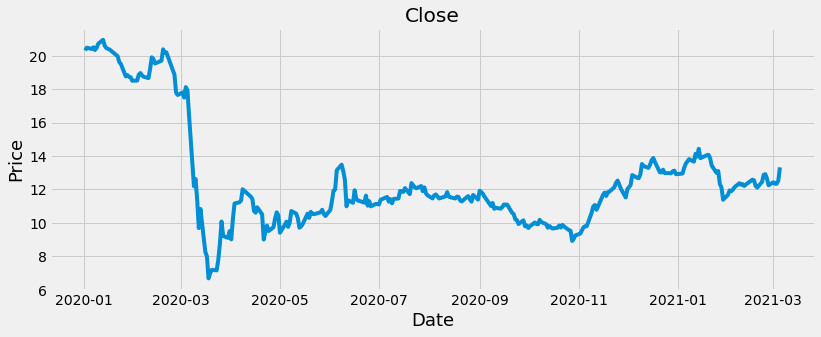

In [ ]:
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Close')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [ ]:
# Calculate the three moving averages
#Calculate ther Short / Fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust=False).mean()
# Calculate the Middle / Medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
# Calculate the Long / Slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust=False).mean()


AttributeError: ignored

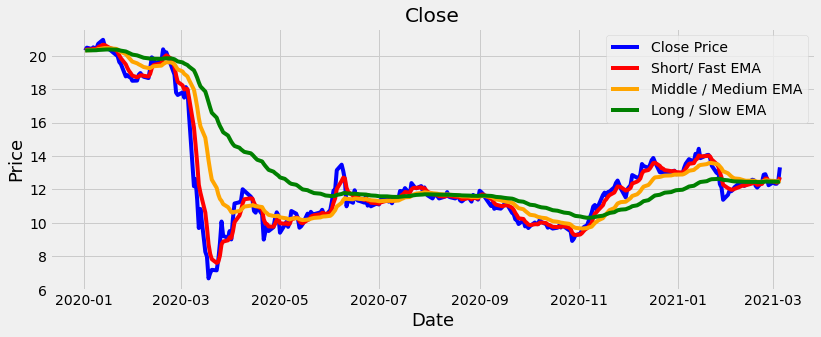

In [ ]:
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Close')
plt.plot(df['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/ Fast EMA', color = 'red')
plt.plot(MiddleEMA, label = 'Middle / Medium EMA', color = 'orange')
plt.plot(LongEMA, label = 'Long / Slow EMA', color = 'green')
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [ ]:
# Add the EMV to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
df

,High,Low,Open,Close,Volume,Adj Close,Short,Middle,Long
Date,,,,,,,,,
2020-01-02,20.410000,20.150000,20.15,20.309999,264900.0,18.582394,20.309999,20.309999,20.309999
2020-01-03,20.700001,20.360001,20.59,20.480000,682700.0,18.737932,20.366666,20.325454,20.315312
2020-01-06,20.530001,20.280001,20.50,20.400000,397200.0,18.664738,20.377777,20.332231,20.317958
2020-01-07,20.580000,20.270000,20.32,20.500000,559200.0,18.756231,20.418518,20.347483,20.323647
2020-01-08,20.540001,20.200001,20.26,20.340000,1498200.0,18.609842,20.392346,20.346802,20.324158
...,...,...,...,...,...,...,...,...,...
2021-03-01,12.700000,12.390000,12.50,12.430000,771600.0,12.430000,12.488215,12.512723,12.466412
2021-03-02,12.530000,12.260000,12.41,12.340000,792300.0,12.340000,12.438810,12.497021,12.462462
2021-03-03,12.470000,12.270000,12.37,12.340000,1245800.0,12.340000,12.405873,12.482746,12.458635


In [ ]:
#Create the function to buy and sell the stock
def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

In [ ]:
#Add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

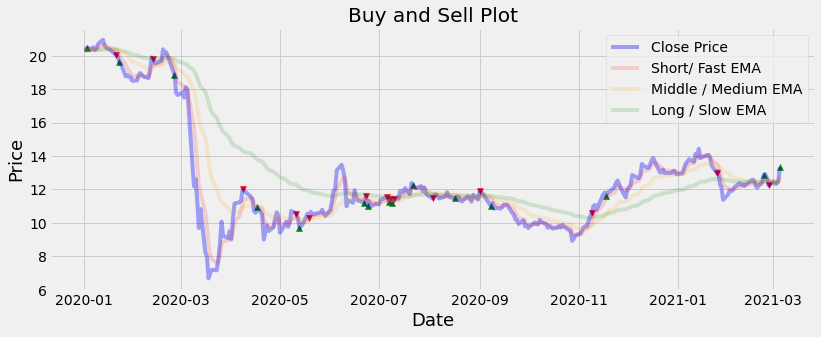

In [ ]:
#Visually show the stock buy 
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Buy and Sell Plot')
plt.plot(df['Close'], label = 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short/ Fast EMA', color = 'red', alpha = 0.15)
plt.plot(MiddleEMA, label = 'Middle / Medium EMA', color = 'orange', alpha = 0.15)
plt.plot(LongEMA, label = 'Long / Slow EMA', color = 'green', alpha = 0.15)
plt.scatter(df.index, df['Buy'], color='green', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color='red', marker = 'v', alpha = 1)
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

